<a href="https://colab.research.google.com/github/Luke-Chesley/Philly-Crime-Data/blob/main/Philly_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [23]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 15.9 MB/s 
     |████████████████████████████████| 960 kB 61.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing data

In [2]:
df = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272022-01-01%27%20AND%20dispatch_date_time%20%3C%20%272023-01-01%27')
df = df.drop(labels=['the_geom','the_geom_webmercator','dc_key','point_x', 'point_y', 'dispatch_date_time', 'cartodb_id', 'psa'], axis=1)

In [3]:
df

,objectid,dc_dist,dispatch_date,dispatch_time,hour_,location_block,ucr_general,text_general_code,lat,lng
0,2858559,77,2022-05-17,20:08:00,20.0,PIA TERMINAL @ 98 PIA WAY,600,Thefts,NaN,NaN
1,2858560,77,2022-01-20,13:58:00,13.0,PIA TERMINAL @ 98 PIA WAY,600,Thefts,NaN,NaN
2,2858561,77,2022-02-19,13:24:00,13.0,PIA TERMINAL @ 98 PIA WAY,600,Theft from Vehicle,NaN,NaN
3,2858562,77,2022-03-24,06:12:00,6.0,PIA TERMINAL @ 98 PIA WAY,600,Thefts,NaN,NaN
4,2858563,77,2022-03-24,06:12:00,6.0,PIA TERMINAL @ 98 PIA WAY,600,Thefts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
115986,4644836,18,2022-10-06,22:19:00,22.0,3100 BLOCK CHESTNUT ST,700,Motor Vehicle Theft,39.953517,-75.185333
115987,3363266,15,2022-08-25,17:25:00,17.0,4600 BLOCK FRANKFORD AV,1800,Narcotic / Drug Law Violations,40.014989,-75.085695
115988,3398318,39,2022-08-26,16:50:00,16.0,300 BLOCK EARLHAM TER,2600,All Other Offenses,40.027408,-75.176833
115989,4401184,24,2022-09-27,09:24:00,9.0,KENSINGTON AV & E ALLEGHENY AV,600,Thefts,39.996526,-75.113358


In [4]:
df.loc[df['ucr_general'] == 600]['text_general_code'] .unique()

array(['Thefts', 'Theft from Vehicle'], dtype=object)

In [5]:
df['text_general_code'].unique()

array(['Thefts', 'Theft from Vehicle', 'Aggravated Assault Firearm',
       'Aggravated Assault No Firearm', 'Robbery No Firearm',
       'Robbery Firearm', 'Burglary Non-Residential', 'Rape',
       'Burglary Residential', 'Narcotic / Drug Law Violations',
       'Weapon Violations', 'Disorderly Conduct', 'Other Assaults',
       'Vandalism/Criminal Mischief', 'Receiving Stolen Property',
       'Arson', 'Homicide - Criminal', 'All Other Offenses',
       'Other Sex Offenses (Not Commercialized)',
       'Forgery and Counterfeiting', 'Fraud',
       'Offenses Against Family and Children', 'Embezzlement',
       'Prostitution and Commercialized Vice',
       'DRIVING UNDER THE INFLUENCE', 'Public Drunkenness',
       'Gambling Violations', 'Liquor Law Violations',
       'Vagrancy/Loitering', 'Motor Vehicle Theft',
       'Homicide - Criminal '], dtype=object)

In [6]:
df['ucr_general'].unique()

array([ 600,  400,  300,  500,  200, 1800, 1500, 2400,  800, 1400, 1300,
        900,  100, 2600, 1700, 1000, 1100, 2000, 1200, 1600, 2100, 2300,
       1900, 2200, 2500,  700])

# Homicides by police district

In [32]:
homicide_district_counts = df.loc[df['text_general_code'] == 'Homicide - Criminal']['dc_dist'].value_counts().to_frame().sort_index()

In [34]:
homicide_district_counts_x = [str(x) for x in sorted(homicide_district_counts.index.to_list())]

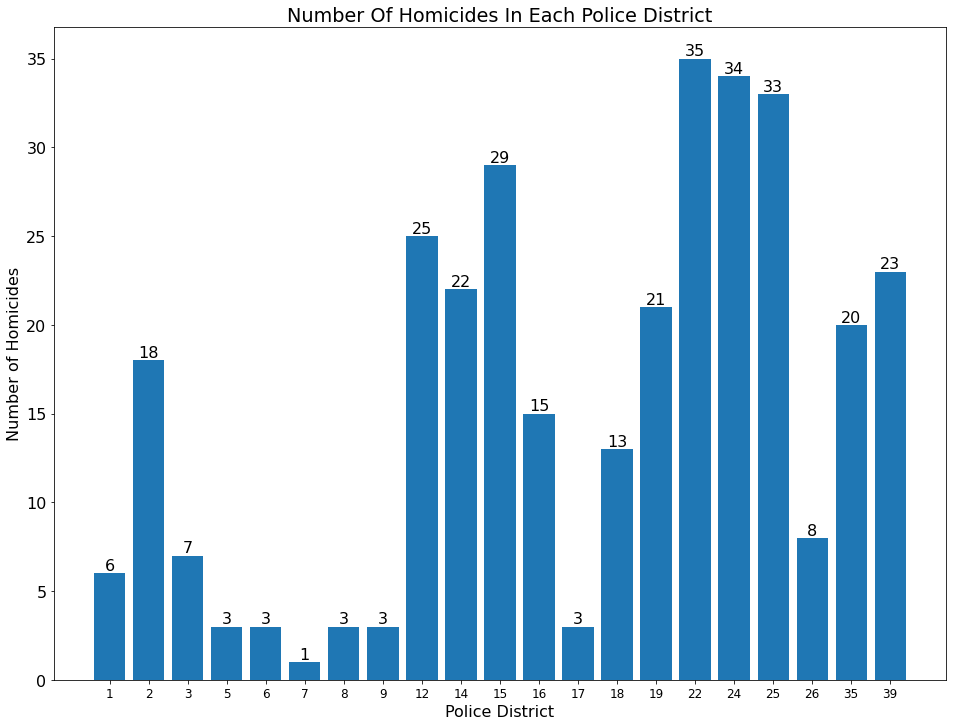

In [59]:
fig, ax = plt.subplots(figsize=(16,12))
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels



p1 = ax.bar(x = homicide_district_counts_x,
        height = homicide_district_counts['dc_dist'],
        data=homicide_district_counts)

ax.set_ylabel('Number of Homicides')
ax.set_xlabel('Police District')
ax.set_title('Number Of Homicides In Each Police District')

ax.bar_label(p1, label_type='edge')

plt.show()


Map of Philadelphia Police Districts

<img src='https://drive.google.com/uc?id=1m7f3ttFQxpYVGVLkHn8oe3cjAAidSe8W' width = "550" height = "550">

#Homicides by Hour

In [36]:
homicide_hour_counts = df.loc[df['text_general_code'] == 'Homicide - Criminal']['hour_'].value_counts().to_frame().sort_index()

In [37]:
homicide_hour_counts_x = [str(x) for x in sorted(homicide_hour_counts.index.to_list())]

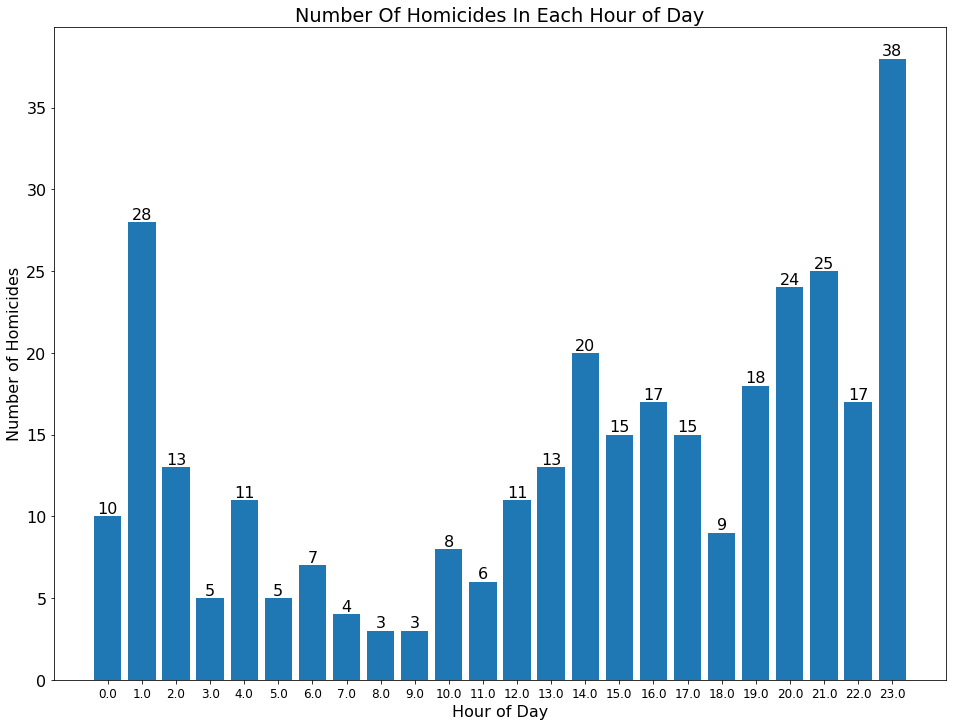

In [58]:
fig, ax = plt.subplots(figsize=(16,12))
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16) 


p1 = ax.bar(x = homicide_hour_counts_x,
        height = homicide_hour_counts['hour_'],
        data=homicide_hour_counts)

ax.set_ylabel('Number of Homicides')
ax.set_xlabel('Hour of Day')
ax.set_title('Number Of Homicides In Each Hour of Day')

ax.bar_label(p1, label_type='edge')

plt.show()
